 # Mandatory Assignment 1

 This is the first of two mandatory assignments which must be completed during the course. First some practical information:

 * When is the assignment due?: **23:59, Sunday, August 19, 2018.**
 * How do you grade the assignment?: You will **peergrade** each other as primary grading.
 * Can i work with my group?: **yes**

 The assigment consist of one to tree problems from each of the exercise sets you have solved so far (excluding Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

 ## Problems from Exercise Set 2:

 > **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel.

 # [Answer to Ex. 2.2 here] (convert to markdown cell)

 1. Numbered list item 1
 2. Numbered list item 2
   1. Numbered sub-list item 1
   2. Numbered sub-list item 2
     1. Numbered sub-sub-list item 1
     2. Numbered sub-sub-list item 2
   3. Numbered sub-list item 3
 3. Numbered list item 3


 - Unnumbered list item 1
 - Unnumbered list item 2
   - Unnumbered sub-list item 1
   - Unnumbered sub-list item 2
     - Unnumbered sub-sub-list item 1
     - Unnumbered sub-sub-list item 2
   - Unnumbered sub-list item 3
 - Unnumbered list item 3

 ## Problems from Exercise set 3:

 > **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence `"Is r > g?"` using your knowledge about string formatting. Store this new string in a variable called `answer_31`. Make sure there is only one space in between worlds.
 >
 >> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [1]:
# [Answer to Ex. 3.1.3 here]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']

# YOUR CODE HERE
answer_31 = '{} {}{} {}{}'.format(l1[1], l1[0], l1[2], l1[-2].strip(), l1[-1])



In [2]:
assert answer_31 == "Is r > g?"


 > **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`. Store the result in a new variable called `answer_32`.
 >
 >> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [3]:
# [Answer to Ex. 3.1.4 here]
W = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']

def starts_with_vowel(word: str) -> bool:
    return word[0] in 'aeiouy'

# YOUR CODE HERE
answer_32 = {w: starts_with_vowel(w) for w in W} # uses dictionary comprehension and starts_with_vowel function



In [4]:
assert answer_32 == {i: i[0] in 'aeiou' for i in W}
assert sorted(answer_32) == sorted(W)


 > **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` which you defined in the previous question (ex 3.3.1) to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
 >
 > Store the birth data in a new variable called `answer_33`.
 >
 >> _Hint:_ The `requests.response` object has a `.json()` method.
 >
 >> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [5]:
# [Answer to Ex. 3.3.2 here]
from typing import List
import requests

def construct_link(table: str, variables: List[str]) -> str:
    #url = '&'.join([urllib.parse.quote_plus(vpair) for vpair in variables])
    url = '&'.join(variables)
    return 'https://api.statbank.dk/v1/data/{}/JSONSTAT?{}'.format(table, url)

link = construct_link('FOD', ['Tid=*', 'BARNKON=P'])
response = requests.get(link)

female_birth_rate_json = response.json()

# YOUR CODE HERE
answer_33 = female_birth_rate_json



In [6]:
assert sorted(answer_33['dataset'].keys()) == ['dimension', 'label', 'source', 'updated', 'value']
assert 'BARNKON' in answer_33['dataset']['dimension'].keys()


 ## Problems from exercise set 4


In [7]:
import numpy as np
import pandas as pd


 > **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). Store the dataframe in a variable called `answer_41`.
 >
 >> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
 >
 >> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
 >
 >> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file.

In [8]:
# [Answer to Ex. 4.1.1 here]

# YOUR CODE HERE
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
answer_41 = pd.read_csv(url, header=None, compression='gzip')



In [9]:
assert answer_41.shape == (27349, 8)
assert list(answer_41.columns) == list(range(8))


 > **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
 >
 > Store the resulting dataframe in a new variable called `answer_42`.
 >
 >> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [10]:
# [Answer to Ex. 4.1.2 here]

def get_weather_data(year):
    base_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{}.csv.gz'
    df_weather = pd.read_csv(base_url.format(str(year)),
                            compression='gzip',
                            header=None).iloc[:, :4] # Truncate rows to only the first 4 columns
    # name the columns
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    # Wrangle tempeture, it comes in tenth of degrees
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    return df_weather

# YOUR CODE HERE
answer_42 = get_weather_data(1864)



In [11]:
assert answer_42.shape == (27349, 4)
assert 144.8 in [answer_42[i].max() for i in answer_42]
assert -666.0 in [answer_42[i].min() for i in answer_42]
assert 18640101 in [answer_42[i].min() for i in answer_42]


 > **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
 >
 > Store the subsetted dataframe in a new variable called `answer_43`.
 >
 >> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
 >
 >> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [12]:
# [Answer to Ex. 4.1.3 here]
from pandas import DataFrame

def get_station_measurements(df: DataFrame, station_id: str) -> DataFrame:
    df_station = df.loc[(df['station'] == station_id)].copy()
    return df_station

def select_measurement(df: DataFrame, obs_type: str) -> DataFrame:
    df_select_tmax = df[(df['obs_type'] == obs_type)].copy()
    return df_select_tmax

# YOUR CODE HERE
answer_43 = select_measurement(get_station_measurements(answer_42, 'ITE00100550'), 'TMAX')



In [13]:
assert 'ITE00100550' in [answer_43[i].min() for i in answer_43]
assert 'ITE00100550' in [answer_43[i].max() for i in answer_43]
assert 'TMAX' in [answer_43[i].min() for i in answer_43]
assert 'TMAX' in [answer_43[i].max() for i in answer_43]


 > **Ex. 4.1.4:** Make a new column in `answer_44` called `TMAX_F` where you have converted the temperature variables to Fahrenheit. Make sure not to overwrite `answer_43`.
 >
 > Store the resulting dataframe in a variable called `answer_44`.
 >
 >> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [14]:
# [Answer to Ex. 4.1.4 here]
answer_44 = answer_43.copy()

def c_to_f(c: int) -> float:
    return 32 + 1.8 * c

# YOUR CODE HERE
answer_44['TMAX_F'] = answer_44['obs_value'].apply(c_to_f)



In [15]:
assert set(answer_44.columns) -  set(answer_43.columns) == {'TMAX_F'}


 ## Problems from exercise set 5

In [16]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

get_ipython().run_line_magic('matplotlib', 'inline')

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')


 > **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class.
 >
 > Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
 >
 > > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


In [17]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 # Titanic dataset description

 The dataset contains information related to the passengers of [RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic). The following information is contained inside the dataset: *survived*, *pclass*, *sex*, *age*, *sibsp*, *parch*, *fare*, *embarked*, *class*, *who*, *adult_male*, *deck*, *embark_town*, *alive*, *alone*.

 A further description of the data is shown in the following list:

 - **survived**: Describes whether the passenger survived the disaster (0 = No, 1 = Yes)
 - **pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
 - **sex**: Sex of the passenger
 - **age**: Age of the passenger
 - **sibsp**: Number of siblings/spouses aboard the Titanic
 - **parch**: Number of parents/children aboard the Titanic
 - **fare**: Passenger fare (in British pound)
 - **embarked**: Port of embarkment (C = Cherbourg, Q = Queenstown, S = Southhampton)
 - **class**: The passenger class as Categorical data
 - **who**: Description of whether the passenger (man, woman or child)
 - **adult_male**: Was the passenger an adult male (True or False)
 - **deck**: Denotes which deck the passenger was situated at (1st class, top decks (A-E), 2nc class (D-F), and 3rd class (E-G)) [RMS Titanic deckplan](https://www.encyclopedia-titanica.org/titanic-deckplans/)
 - **embark_town**: A string desription of **embarked**
 - **alive**: N/A [1]
 - **alone**: Was the passenger alone (True or False)

 [1] No information was found on this variable, it might be whether the passenger was this alive at the dataset creation time or another specified time.

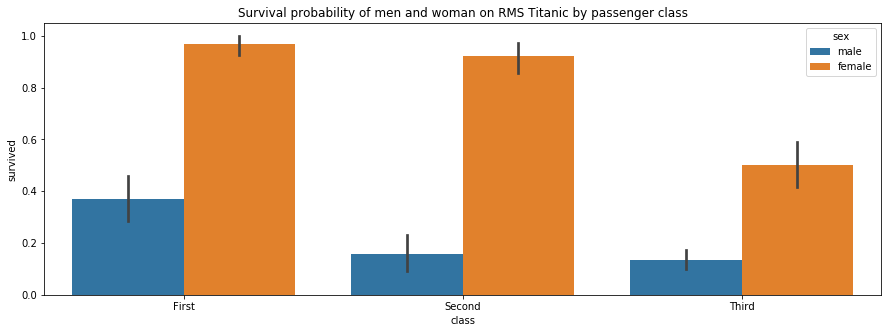

In [18]:
# [Answer to Ex. 5.1.1 here]
figure_size = (15, 5)
# YOUR CODE HERE
plt.figure(figsize=figure_size)
plt.title('Survival probability of men and woman on RMS Titanic by passenger class')
sns.barplot(x='class', y='survived', hue='sex', data=titanic)



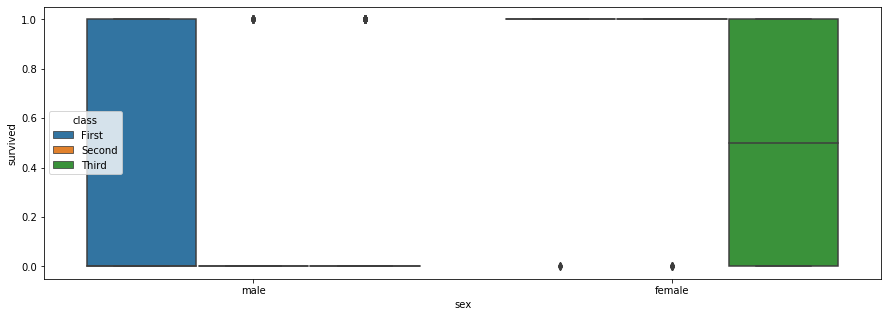

In [19]:
# We now try to make a boxplot showing the same information
plt.figure(figsize=figure_size)
sns.boxplot(x='sex', y='survived', hue='class', data=titanic)


 As we can see from the above boxplot, it does not seem to make sense to plot the survival probability using a boxplot.

 # Bonus: Show a boxplot of passenger fare price

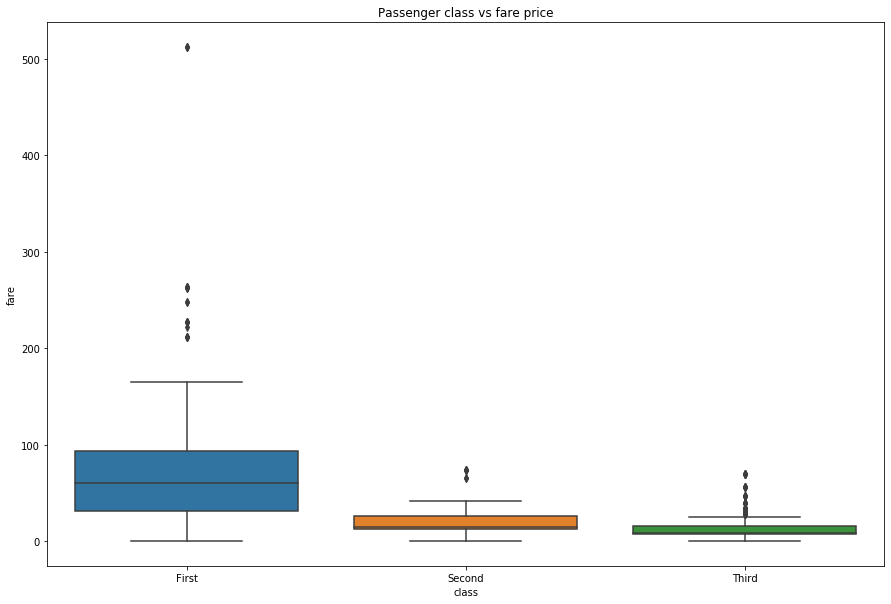

In [20]:
plt.figure(figsize=(15,10))
plt.title('Passenger class vs fare price')
sns.boxplot(x='class', y='fare', data=titanic)



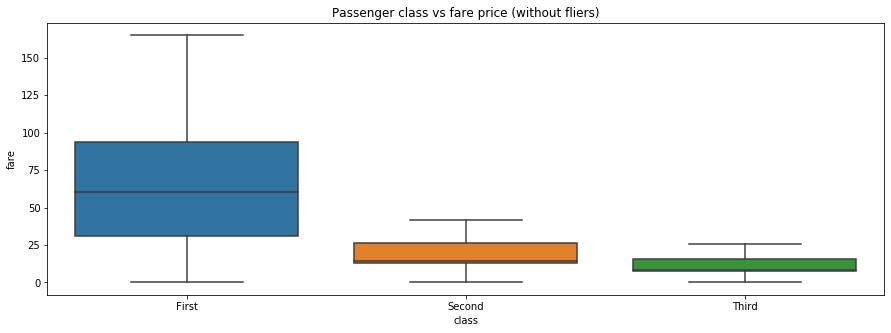

In [21]:
plt.figure(figsize=figure_size)

plt.title('Passenger class vs fare price (without fliers)')
sns.boxplot(x='class', y='fare', data=titanic, showfliers=False)


 > **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
 > _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
 >
 > For a better understanding of the dataset this image might be useful:
 > <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
 >
 >> _Hint:_ use the `.regplot` method from seaborn.

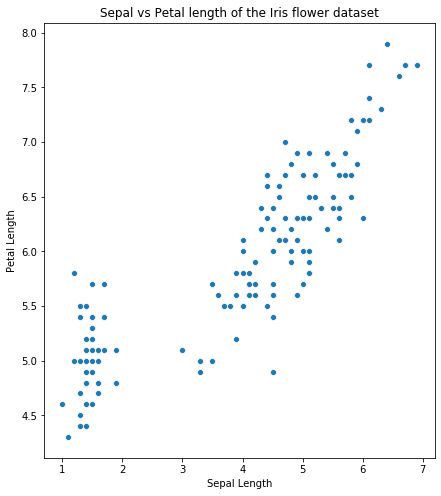

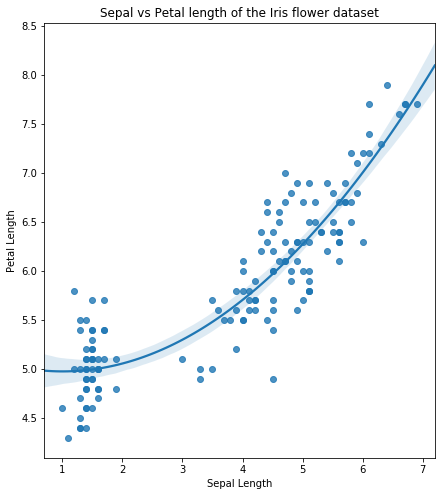

In [22]:
# [Answer to Ex. 5.1.2 here]

# YOUR CODE HERE
plt.figure(figsize=(7,8))
sns.scatterplot(x='petal_length', y='sepal_length', data=iris)
plt.title('Sepal vs Petal length of the Iris flower dataset')
plt.xlabel('Sepal Length')
_ = plt.ylabel('Petal Length')

plt.figure(figsize=(7, 8))
plt.title('Sepal vs Petal length of the Iris flower dataset')
sns.regplot(x='petal_length', y='sepal_length', data=iris, order=2)
plt.xlabel('Sepal Length')
_ = plt.ylabel('Petal Length')


 > **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
 > <img src="Example.png" alt="Drawing" style="width: 600px;"/>
 >
 > Save the figure as a png file on your computer.
 >> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

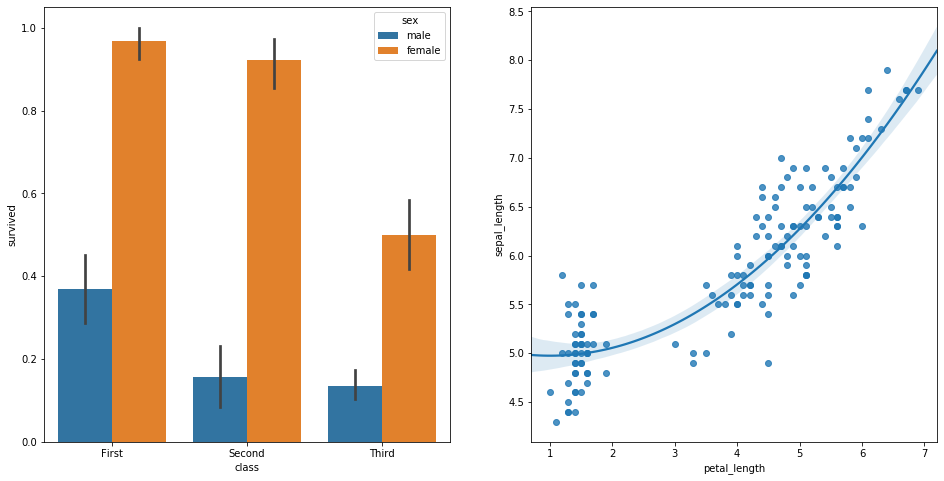

In [23]:
# [Answer to Ex. 5.1.3 here]

# YOUR CODE HERE
f, axes = plt.subplots(1, 2, figsize=(16,8))

sns.barplot(x='class', y='survived', hue='sex', data=titanic, ax=axes[0])
sns.regplot(x='petal_length', y='sepal_length', data=iris, order=2, ax=axes[1])

f.savefig('subplot_demo.png', dpi=100)


 > **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

<Figure size 1296x1296 with 0 Axes>

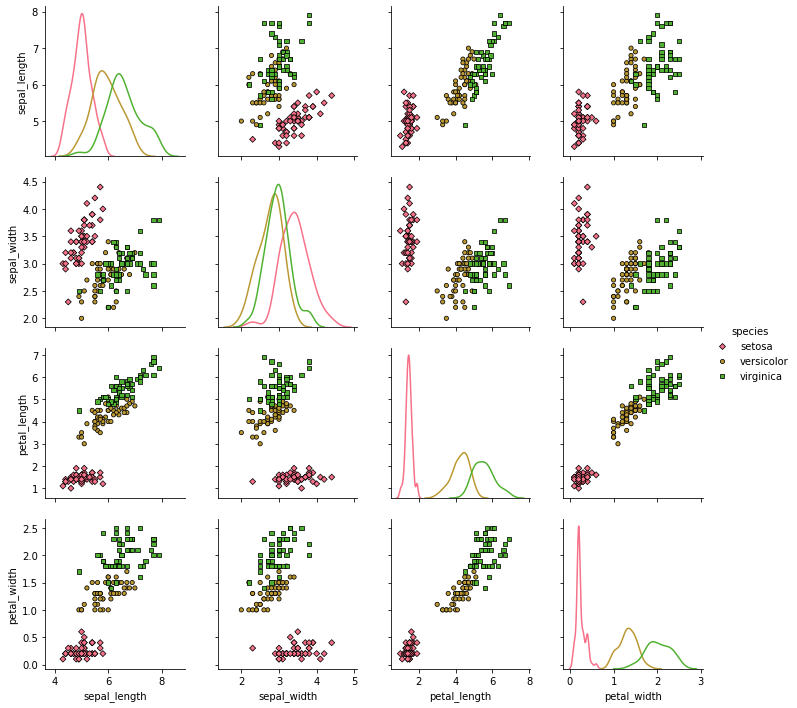

In [24]:
# [Answer to Ex. 5.1.4 here]

# YOUR CODE HERE
marker_symbols = ['D', 'o', 's']
# Make edge color of the point plot black and make the dots smaller
plot_kws = dict(edgecolor="k", size=3)
# Use diag_kws to disable shade in the diagonal KDE-plots
diag_kws = dict(shade=False)
plt.figure(figsize=(18, 18))
sns.pairplot(data=iris,
             hue='species',
             diag_kws=diag_kws,
             plot_kws=plot_kws,
             palette=sns.color_palette('husl'),
             markers=marker_symbols)


 # Bonus: Describe what diag_kws does

 diag_kws can be used to pass addition keyword arguments to the diagonal plot of the pairplot. As seen below, we pass the dictionary = `{'shade': True}` to the pairplot to enable drawing a shade in the diagonal KDE-plot, compare this figure with the above figure.

<Figure size 1296x1296 with 0 Axes>

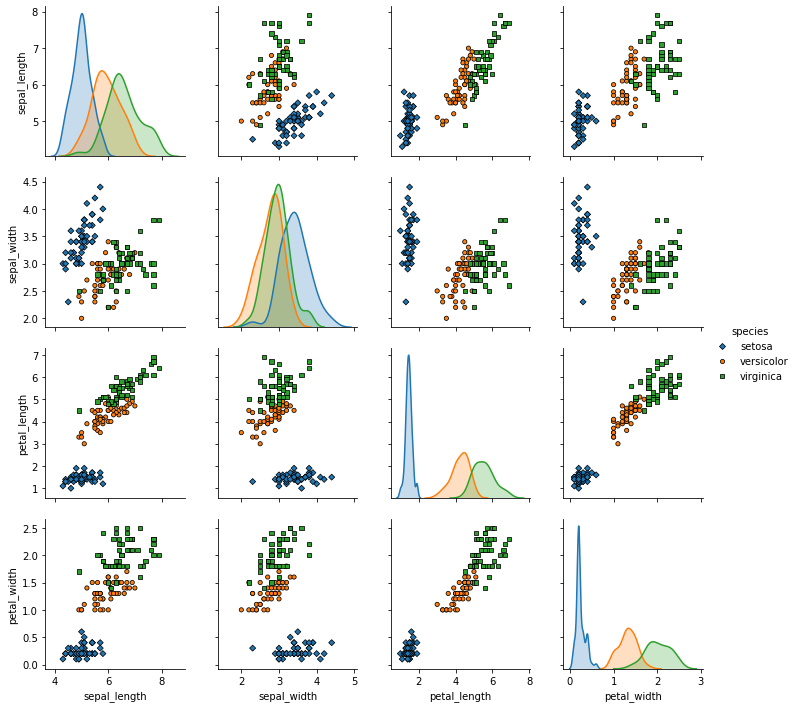

In [25]:
plt.figure(figsize=(18, 18))
sns.pairplot(data=iris,
             hue='species',
             diag_kws={'shade': True}, # Enables shade on the diagonal KDE-plots
             plot_kws=plot_kws, # Reuse the old plot kws
             markers=marker_symbols)


 ## Problems from exercise set 6

 > _Note:_ In the exercises we asked you to download weather data from the NOAA website. For this assignment the data are loaded in the following code cell into two pandas dataframes.

In [26]:
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import matplotlib.pyplot as plt

weather_1864 = pd.read_csv('weather_data_1864.csv')


 > **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
 >
 > Create a new column in `weather_1864` called `answer_61` and store the country codes here.
 >
 >> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

In [27]:
# [Answer to Ex. 6.1.4]
import re

country_code_matcher = re.compile('^[A-Z]{2,3}')

def get_country_code(station_id: str) -> str:
    return country_code_matcher.match(station_id).group()

# YOUR CODE HERE
weather_1864['answer_61'] = weather_1864['station'].apply(get_country_code)



In [28]:
assert sorted(weather_1864['answer_61'].str[:2].unique()) == sorted(['SZ', 'CA', 'EZ', 'GM', 'AU', 'IT', 'BE', 'UK', 'EI', 'AG', 'AS'])


 > **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend.
 >
 > Name your function `prepareWeatherData`.

In [29]:
# [Answer to Ex. 6.1.5]
from pandas import DataFrame

def prepareWeatherData(year: int) -> DataFrame:
    base_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{}.csv.gz'
    df_weather = pd.read_csv(base_url.format(str(year)),
                            compression='gzip',
                            header=None).iloc[:, :4] # Truncate rows to only the first 4 columns
    # name the columns
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    # convert datetime: int -> datetime: datetime
    df_weather['datetime'] = pd.to_datetime(df_weather['datetime'], format='%Y%m%d')
    # Wrangle tempeture, it comes in tenth of degrees
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    # Choose only the observation type TMAX
    df_select_tmax = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    df_select_tmax['tmax_f'] = 32 + 1.8 * df_select_tmax['obs_value']
    df_sorted = df_select_tmax.reset_index(drop=True).sort_values(by=['obs_value'])
    df_sorted['country_code'] = df_sorted['station'].apply(get_country_code)
    return df_sorted



In [30]:
assert prepareWeatherData('1864').shape == (5686, 6)


 ## Problems from exercise set 7

 > _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [31]:
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6


 > **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864.

 > *Hint*: the method `describe` computes all these measures.

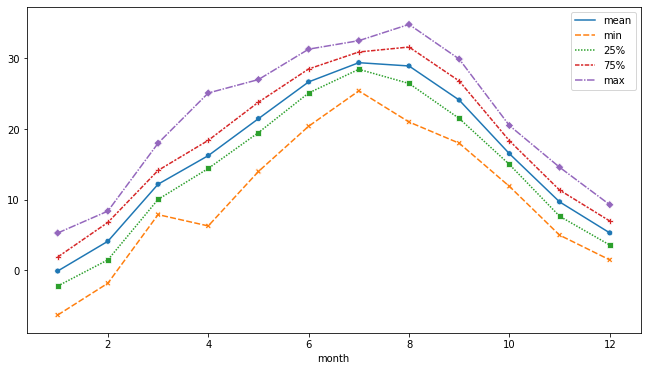

In [32]:
# [Answer to Ex. 7.1.1]
# YOUR CODE HERE
from datetime import datetime
from typing import List

def get_month(d: datetime) -> int:
    return d.month

def get_monthly_description(df: DataFrame,
                            station_id: str,
                            apply_vars: List[str],
                            month_col: str='month') -> DataFrame:
    w1864_station = df[df['station'] == station_id].copy()
    w1864_station[month_col] = w1864_station['datetime'].apply(get_month)
    df_description = w1864_station.groupby(month_col)         [apply_vars]         .describe()         .copy()
    df_description.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    df_cleaned = df_description.drop(['count', 'std', '50%'], axis=1).copy()
    return df_cleaned

station_id = 'ITE00100550'
month_col = 'month'
apply_vars = ['obs_value']

# Convert datetime: int -> datetime: datetime
weather_1864['datetime'] = pd.to_datetime(weather_1864['datetime'], format='%Y%m%d')

cleaned_monthly = get_monthly_description(weather_1864, station_id, apply_vars)
legend_names = cleaned_monthly.columns
sns.lineplot(data=cleaned_monthly)
sns.scatterplot(data=cleaned_monthly)
plt.legend(legend_names)


 > **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically.
 >
 > Name the concatenated data `answer_72`

In [33]:
# [Answer to Ex. 7.1.2]

def get_year(d: datetime) -> int:
    return d.year

years = range(1864, 1868)
# YOUR CODE HERE
df_list = [prepareWeatherData(year) for year in years]
answer_72 = pd.concat(df_list)
answer_72['year'] = answer_72['datetime'].apply(get_year)



In [34]:
assert answer_72.shape == (30003, 7)

 > **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.
 >
 > Store the merged data in a new variable called `answer_73`.
 >
 > _Hint:_ The location data have the folllowing format,

 ```
 ------------------------------
 Variable   Columns   Type
 ------------------------------
 ID            1-11   Character
 LATITUDE     13-20   Real
 LONGITUDE    22-30   Real
 ELEVATION    32-37   Real
 STATE        39-40   Character
 NAME         42-71   Character
 GSN FLAG     73-75   Character
 HCN/CRN FLAG 77-79   Character
 WMO ID       81-85   Character
 ------------------------------
 ```

 > *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [35]:
# [Answer to Ex. 7.1.3]

# YOUR CODE HERE
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'

col_specs = [(0, 11), (12, 19), (21, 29), (31, 36), (38, 39), (41, 70), (72, 74), (76, 78), (80, 84)]

station_geo_data = pd.read_fwf(url,
                   header=None,
                   colspecs=col_specs)

geo_column_names = ['station', 'latitude', 'longtitude', 'elevation', 'state', 'name', 'gsn_flag', 'hcn/crn_flag', 'wmo_id']
station_geo_data.columns = geo_column_names

answer_73 = pd.merge(
    left=answer_72,
    right=station_geo_data,
    left_on='station',
    right_on='station',
    how='left')

In [36]:
assert answer_73.shape == (5686, 15) or answer_73.shape == (30003, 15)

 ## Problems from exercise set 8

 > **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings.
 >
 > Store the response.json() object in a new variable called `answer_81`.
 >

In [37]:
import requests
import os
import time

def ratelimit():
    "A function that handles the rate of your calls."
    time.sleep(1) # sleep one second.

class Connector():
  def __init__(self,logfile,overwrite_log=False,connector_type='requests',session=False,path2selenium='',n_tries = 5,timeout=30):
    """This Class implements a method for reliable connection to the internet and monitoring. 
    It handles simple errors due to connection problems, and logs a range of information for basic quality assessments
    
    Keyword arguments:
    logfile -- path to the logfile
    overwrite_log -- bool, defining if logfile should be cleared (rarely the case). 
    connector_type -- use the 'requests' module or the 'selenium'. Will have different since the selenium webdriver does not have a similar response object when using the get method, and monitoring the behavior cannot be automated in the same way.
    session -- requests.session object. For defining custom headers and proxies.
    path2selenium -- str, sets the path to the geckodriver needed when using selenium.
    n_tries -- int, defines the number of retries the *get* method will try to avoid random connection errors.
    timeout -- int, seconds the get request will wait for the server to respond, again to avoid connection errors.
    """
    
    ## Initialization function defining parameters. 
    self.n_tries = n_tries # For avoiding triviel error e.g. connection errors, this defines how many times it will retry.
    self.timeout = timeout # Defining the maximum time to wait for a server to response.
    ## not implemented here, if you use selenium.
    if connector_type=='selenium':
      assert path2selenium!='', "You need to specify the path to you geckodriver if you want to use Selenium"
      from selenium import webdriver 
      ## HIN download the latest geckodriver here: https://github.com/mozilla/geckodriver/releases

      assert os.path.isfile(path2selenium),'You need to insert a valid path2selenium the path to your geckodriver. You can download the latest geckodriver here: https://github.com/mozilla/geckodriver/releases'
      self.browser = webdriver.Firefox(executable_path=path2selenium) # start the browser with a path to the geckodriver.

    self.connector_type = connector_type # set the connector_type
    
    if session: # set the custom session
      self.session = session
    else:
      self.session = requests.session()
    self.logfilename = logfile # set the logfile path
    ## define header for the logfile
    header = ['id','project','connector_type','t', 'delta_t', 'url', 'redirect_url','response_size', 'response_code','success','error']
    if os.path.isfile(logfile):        
      if overwrite_log==True:
        self.log = open(logfile,'w')
        self.log.write(';'.join(header))
      else:
        self.log = open(logfile,'a')
    else:
      self.log = open(logfile,'w')
      self.log.write(';'.join(header))
    ## load log 
    with open(logfile,'r') as f: # open file
        
      l = f.read().split('\n') # read and split file by newlines.
      ## set id
      if len(l)<=1:
        self.id = 0
      else:
        self.id = int(l[-1][0])+1
            
  def get(self,url,project_name):
    """Method for connector reliably to the internet, with multiple tries and simple error handling, as well as default logging function.
    Input url and the project name for the log (i.e. is it part of mapping the domain, or is it the part of the final stage in the data collection).
    
    Keyword arguments:
    url -- str, url
    project_name -- str, Name used for analyzing the log. Use case could be the 'Mapping of domain','Meta_data_collection','main data collection'. 
    """
     
    project_name = project_name.replace(';','-') # make sure the default csv seperator is not in the project_name.
    if self.connector_type=='requests': # Determine connector method.
      for _ in range(self.n_tries): # for loop defining number of retries with the requests method.
        ratelimit()
        t = time.time()
        try: # error handling 
          response = self.session.get(url,timeout = self.timeout) # make get call

          err = '' # define python error variable as empty assumming success.
          success = True # define success variable
          redirect_url = response.url # log current url, after potential redirects 
          dt = t - time.time() # define delta-time waiting for the server and downloading content.
          size = len(response.text) # define variable for size of html content of the response.
          response_code = response.status_code # log status code.
          ## log...
          call_id = self.id # get current unique identifier for the call
          self.id+=1 # increment call id
          #['id','project_name','connector_type','t', 'delta_t', 'url', 'redirect_url','response_size', 'response_code','success','error']
          row = [call_id,project_name,self.connector_type,t,dt,url,redirect_url,size,response_code,success,err] # define row to be written in the log.
          self.log.write('\n'+';'.join(map(str,row))) # write log.
          return response,call_id # return response and unique identifier.

        except Exception as e: # define error condition
          err = str(e) # python error
          response_code = '' # blank response code 
          success = False # call success = False
          size = 0 # content is empty.
          redirect_url = '' # redirect url empty 
          dt = t - time.time() # define delta t

          ## log...
          call_id = self.id # define unique identifier
          self.id+=1 # increment call_id

          row = [call_id,project_name,self.connector_type,t,dt,url,redirect_url,size,response_code,success,err] # define row
          self.log.write('\n'+';'.join(map(str,row))) # write row to log.
    else:
      t = time.time()
      ratelimit()
      self.browser.get(url) # use selenium get method
      ## log
      call_id = self.id # define unique identifier for the call. 
      self.id+=1 # increment the call_id
      err = '' # blank error message
      success = '' # success blank
      redirect_url = self.browser.current_url # redirect url.
      dt = t - time.time() # get time for get method ... NOTE: not necessarily the complete load time.
      size = len(self.browser.page_source) # get size of content ... NOTE: not necessarily correct, since selenium works in the background, and could still be loading.
      response_code = '' # empty response code.
      row = [call_id,project_name,self.connector_type,t,dt,url,redirect_url,size,response_code,success,err] # define row 
      self.log.write('\n'+';'.join(map(str,row))) # write row to log file.
    # Using selenium it will not return a response object, instead you should call the browser object of the connector.
    ## connector.browser.page_source will give you the html.
      return call_id

In [38]:
# [Answer to Ex. 8.1.2]

connector = Connector('assignment1.log')

# YOUR CODE HERE
import requests
import pandas as pd
url = 'https://job.jobnet.dk/CV/FindWork/Search?SortValue=CreationDate&Offset=0'
response, call_id = connector.get(url, 'assignment1-ex812')
if response.ok:
    answer_81 = response.json()
else:
    print('error')

In [39]:
assert sorted(answer_81.keys()) == sorted(['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount'])

 > **Ex. 8.1.3.:** Store the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. Name this dataframe `answer_82`.

In [40]:
# [Answer to Ex. 8.1.3]

# YOUR CODE HERE
n_job_postings = answer_81['TotalResultCount']
answer_82 = pd.DataFrame(answer_81['JobPositionPostings'])

In [41]:
assert answer_82.shape == (20, 44)